# Bayesian Regression & MLE for Student Performance Analysis

**Team member**: Hung Dinh - 19774520

**Theme**: Bayesian vs Frequentist Approach on Regression - Student Performance

**Github Repo**: https://github.com/hd54/stat447c

All commits are done by me and me only.

**Introduction**:

Performance have always been a concern for a lot of students regardless of education level, whether it be high school, university, or college. Good performance can mean greater opportunities for higher education, awards, and even jobs, so students want to be successful in their courses. However, there's always a disparity in students' performance, which can be seen in grade distributions of exams, homework, etc. It's possible that students' background or how they treat the class affect their performance. This project seeks to see how different factors contribute to students' performance (in particular, final exam score or course grade letter). The main goal would to be able to predict performance based on most influential predictors.

**Dataset**:

Student performance may vary throughout the years due to societal changes, introduction of new technologies (such as ChatGPT), etc. This leads me to choose some of the more recent datasets as possible candidates:

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

https://www.kaggle.com/datasets/joebeachcapital/students-performance

In [1]:
library(tidyverse)
library(car)
library(caret)
library(glmnet)
library(rstan)
library(ggplot2)

set.seed(100)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loa

In [2]:
dataset_1 <- read.csv("StudentPerformanceFactors.csv")
head(dataset_1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
2,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
4,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
6,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71


In [3]:
dataset_2 <- read.csv("StudentsPerformance_with_headers.csv")
head(dataset_2)

,STUDENT.ID,Student.Age,Sex,Graduated.high.school.type,Scholarship.type,Additional.work,Regular.artistic.or.sports.activity,Do.you.have.a.partner,Total.salary.if.available,Transportation.to.the.university,...,Preparation.to.midterm.exams.1,Preparation.to.midterm.exams.2,Taking.notes.in.classes,Listening.in.classes,Discussion.improves.my.interest.and.success.in.the.course,Flip.classroom,Cumulative.grade.point.average.in.the.last.semester...4.00.,Expected.Cumulative.grade.point.average.in.the.graduation...4.00.,COURSE.ID,GRADE
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
2,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
3,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
4,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
5,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
6,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2


**Approaches**:


I can start simple with a comparative study of different types of regression using frequentist and Bayesian approach. I can do a comparative study on traditional (without penalty) and regularized regression for each approach. For frequentist approach, I can start by optimizing the number of variables used for regression through removing collinearity (i.e. we can use forward selection along with VIF analysis). I would expect to see regularized model to perform at least as well on predicting data due to the extra penalty added.

For Bayesian approach, we can use hierarchical model. It happens that we can treat the regularizer term as a part of the prior, since it controls how much information we can learn from data, whereas frequentist approach will include an extra term as penalty value. I can also experiment with using different priors for discrete and continuous variables, whereas dummy variables can be used for frequentist paradigm as mentioned above.

References show that I can use a Laplace prior in response to frequentist LASSO regression, and a Normal prior for ridge regression. This is good news - I would expect the performance between frequentist and Bayesian approach to be somewhat similar, and I don't have to come up with a prior distribution. The only thing left is to find a good variance for the chosen distribution to simulate the regularizer term. Note that the implementation for both methods are very similar with the difference being in the chosen prior for the regularizer term.

In short, the project will be carried out in 4 different tasks:

- Perform EDA: optimize the number of variables used for modeling, some visualisations, etc.
- Perform frequentist approach with Lasso/ridge regression
- Perform Bayesian approach using Laplace/Normal priors
- Finally, compare the result between each approach (should produce similar result)

**References**:
https://haines-lab.com/post/on-the-equivalency-between-the-lasso-ridge-regression-and-specific-bayesian-priors/

## Explanatory Data Analysis

I will perform some visualizations for the the first dataset. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


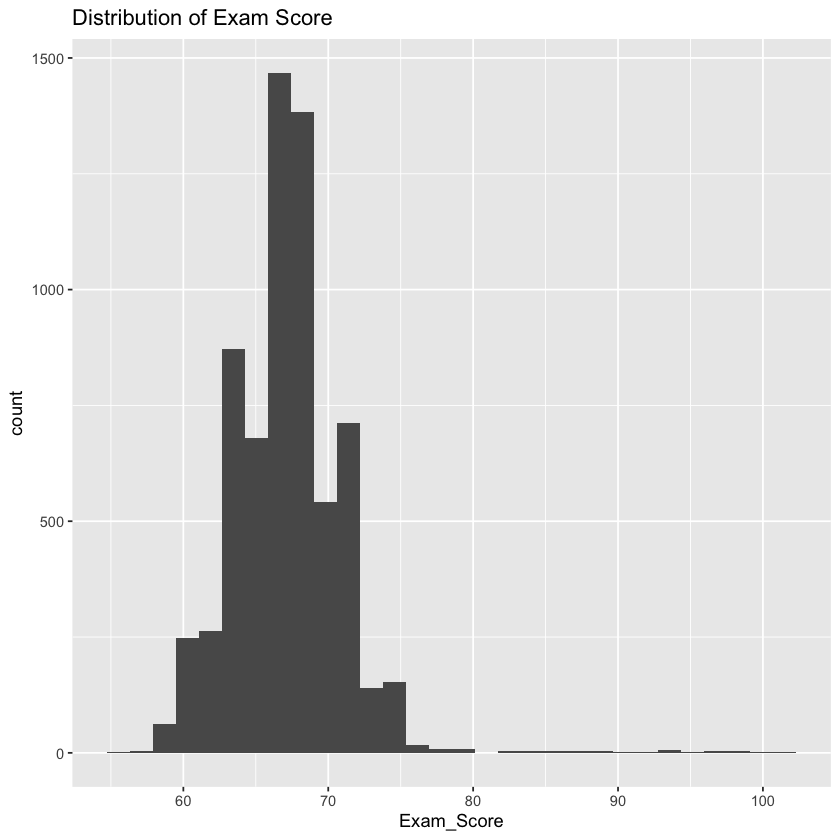

In [4]:
ggplot(dataset_1, aes(x = Exam_Score)) +
  geom_histogram() +
  labs(title = "Distribution of Exam Score")

VIF results suggest multicollinearity is not a problem in this project, so I expect the model to be relatively stable. 

In [5]:
index <- c(3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19)
dataset_1[index] <- lapply(dataset_1[index], as.factor)
summary(dataset_1)

 Hours_Studied     Attendance     Parental_Involvement Access_to_Resources
 Min.   : 1.00   Min.   : 60.00   High  :1908          High  :1975        
 1st Qu.:16.00   1st Qu.: 70.00   Low   :1337          Low   :1313        
 Median :20.00   Median : 80.00   Medium:3362          Medium:3319        
 Mean   :19.98   Mean   : 79.98                                           
 3rd Qu.:24.00   3rd Qu.: 90.00                                           
 Max.   :44.00   Max.   :100.00                                           
 Extracurricular_Activities  Sleep_Hours     Previous_Scores  Motivation_Level
 No :2669                   Min.   : 4.000   Min.   : 50.00   High  :1319     
 Yes:3938                   1st Qu.: 6.000   1st Qu.: 63.00   Low   :1937     
                            Median : 7.000   Median : 75.00   Medium:3351     
                            Mean   : 7.029   Mean   : 75.07                   
                            3rd Qu.: 8.000   3rd Qu.: 88.00                   
 

In [6]:
lm_model <- lm(Exam_Score ~ ., data = dataset_1)
vif_vals <- vif(lm_model)
print(vif_vals)

                               GVIF Df GVIF^(1/(2*Df))
Hours_Studied              1.003462  1        1.001730
Attendance                 1.006153  1        1.003072
Parental_Involvement       1.008631  2        1.002151
Access_to_Resources        1.010530  2        1.002622
Extracurricular_Activities 1.004480  1        1.002237
Sleep_Hours                1.003554  1        1.001775
Previous_Scores            1.006465  1        1.003227
Motivation_Level           1.009400  2        1.002342
Internet_Access            1.003485  1        1.001741
Tutoring_Sessions          1.002305  1        1.001152
Family_Income              1.008834  2        1.002201
Teacher_Quality            1.012133  3        1.002012
School_Type                1.004345  1        1.002170
Peer_Influence             1.008910  2        1.002220
Physical_Activity          1.008009  1        1.003997
Learning_Disabilities      1.003282  1        1.001640
Parental_Education_Level   1.012919  3        1.002142
Distance_f

## Modellings

#### Frequentist Approach

To optimize the number of variables used for the model, I will use forward selection with AIC. The model seems to perform decent based on the visualization as well. I will be using cross-validation as well.

Note that OLS is pretty decent since our model seems to be showing some underlying linear relationship with a decent number of observations compared to predictors. So it may not be too surprising to see that OLS is doing a great job at model fitting compared to using LASSO/Ridge regression.

1. No regularizer

In [7]:
train_idx <- createDataPartition(dataset_1$Exam_Score, p = 0.8, list = FALSE)
train_data <- dataset_1[train_idx, ]
test_data  <- dataset_1[-train_idx, ]

null <- lm(Exam_Score ~ 1, data = train_data)
full <- lm(Exam_Score ~ ., data = train_data)

forward_model <- step(null,
                      scope = list(lower = null, upper = full),
                      direction = "forward")

summary(forward_model)

fwd_formula <- formula(forward_model)

x_train <- model.matrix(formula(forward_model), data = train_data)[, -1]
x_test  <- model.matrix(formula(forward_model), data = test_data)[, -1]
y_train <- train_data$Exam_Score
y_test  <- test_data$Exam_Score

vif_values <- vif(forward_model)
print(vif_values)

Start:  AIC=14406.97
Exam_Score ~ 1

                             Df Sum of Sq   RSS   AIC
+ Attendance                  1   26768.2 53860 12276
+ Hours_Studied               1   16052.6 64576 13235
+ Previous_Scores             1    2472.2 78156 14244
+ Access_to_Resources         2    2197.6 78431 14265
+ Parental_Involvement        2    2148.0 78481 14268
+ Tutoring_Sessions           1    1770.9 78858 14292
+ Parental_Education_Level    3     992.3 79636 14348
+ Peer_Influence              2     881.8 79747 14353
+ Learning_Disabilities       1     790.6 79838 14357
+ Family_Income               2     686.1 79942 14366
+ Motivation_Level            2     623.0 80006 14370
+ Distance_from_Home          3     608.5 80020 14373
+ Teacher_Quality             3     531.3 80097 14378
+ Extracurricular_Activities  1     319.9 80309 14388
+ Internet_Access             1     221.9 80407 14394
+ Physical_Activity           1      69.3 80559 14404
<none>                                    806


Call:
lm(formula = Exam_Score ~ Attendance + Hours_Studied + Access_to_Resources + 
    Parental_Involvement + Previous_Scores + Tutoring_Sessions + 
    Peer_Influence + Family_Income + Parental_Education_Level + 
    Motivation_Level + Teacher_Quality + Distance_from_Home + 
    Extracurricular_Activities + Learning_Disabilities + Internet_Access + 
    Physical_Activity, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3879 -0.4364 -0.1752  0.0948 29.9251 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          41.201132   0.542979  75.880  < 2e-16 ***
Attendance                            0.198852   0.002441  81.458  < 2e-16 ***
Hours_Studied                         0.298848   0.004726  63.241  < 2e-16 ***
Access_to_ResourcesLow               -2.087958   0.081739 -25.544  < 2e-16 ***
Access_to_ResourcesMedium            -1.007890   0.065174 -15.465  < 2e-16 ***
Parental_Involvement

                               GVIF Df GVIF^(1/(2*Df))
Attendance                 1.007208  1        1.003597
Hours_Studied              1.005142  1        1.002568
Access_to_Resources        1.010571  2        1.002632
Parental_Involvement       1.008305  2        1.002070
Previous_Scores            1.006672  1        1.003331
Tutoring_Sessions          1.003644  1        1.001820
Peer_Influence             1.008835  2        1.002202
Family_Income              1.008524  2        1.002124
Parental_Education_Level   1.012825  3        1.002126
Motivation_Level           1.012326  2        1.003067
Teacher_Quality            1.014447  3        1.002393
Distance_from_Home         1.016378  3        1.002711
Extracurricular_Activities 1.006034  1        1.003012
Learning_Disabilities      1.004485  1        1.002240
Internet_Access            1.003401  1        1.001699
Physical_Activity          1.008115  1        1.004049


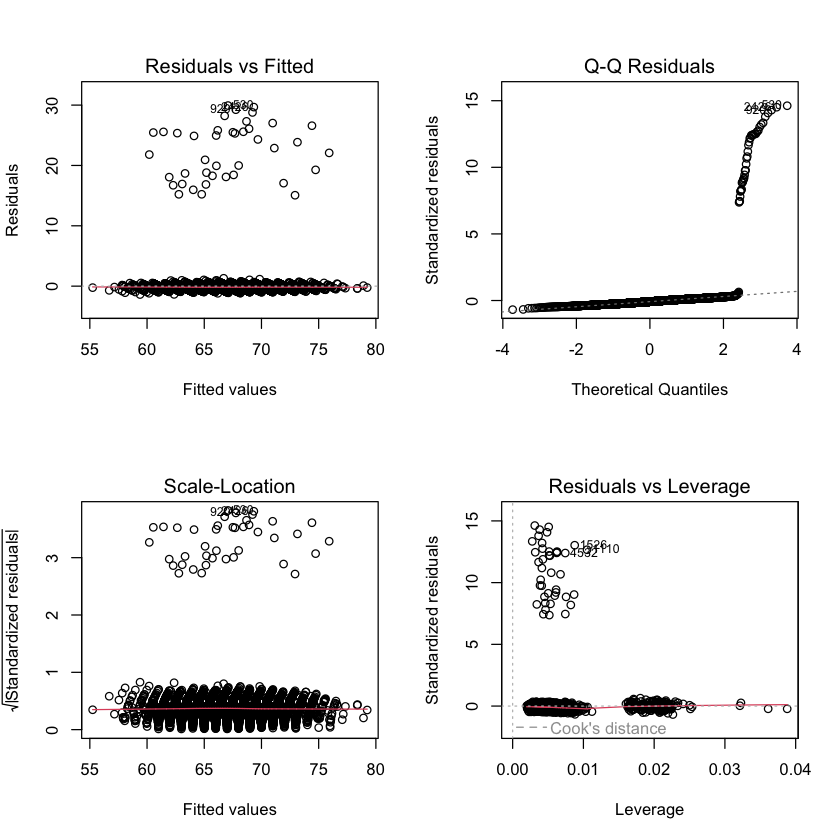

In [8]:
par(bg = "white")
par(mfrow = c(2, 2))
plot(forward_model)

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


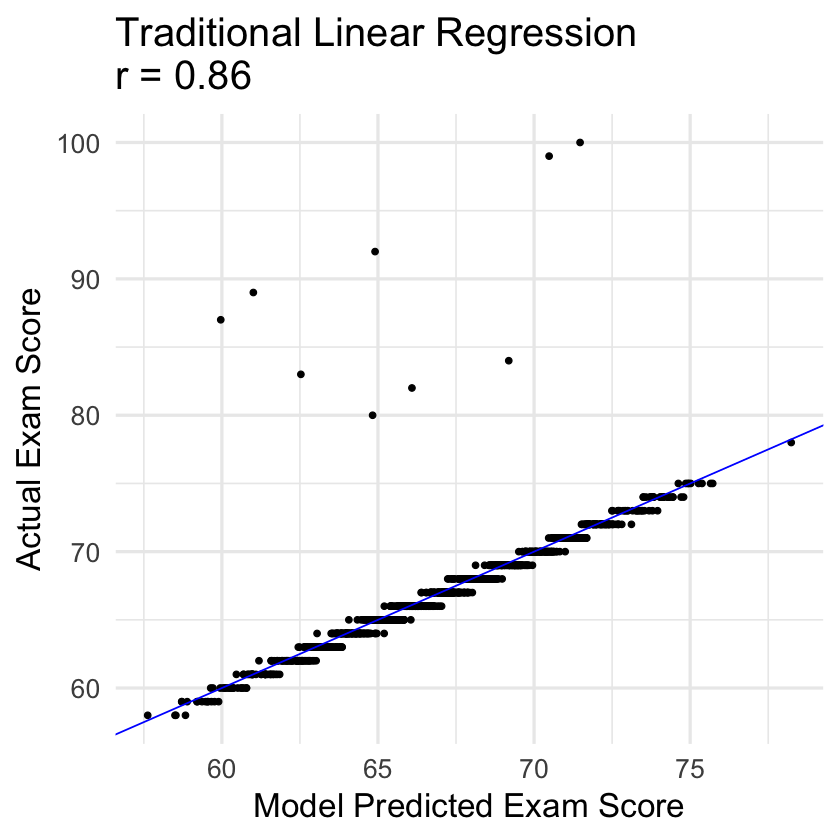

In [9]:
x_train_scale <- scale(x_train)
means <- attr(x_train_scale, "scaled:center")
sds   <- attr(x_train_scale, "scaled:scale")
x_test_scale <- scale(x_test, center = means, scale = sds)

fit_lr <- lm(y_train ~ ., data = as.data.frame(x_train_scale))

y_pred_lr <- predict(fit_lr, newdata = as.data.frame(x_test_scale))

qplot(x = y_pred_lr, y = y_test,
      main = paste0("Traditional Linear Regression\n",
                    "r = ", round(cor(y_test, y_pred_lr), 2))) +
  geom_abline(color = "blue") +
  xlab("Model Predicted Exam Score") +
  ylab("Actual Exam Score") +
  theme_minimal(base_size = 20)

2. LASSO regression

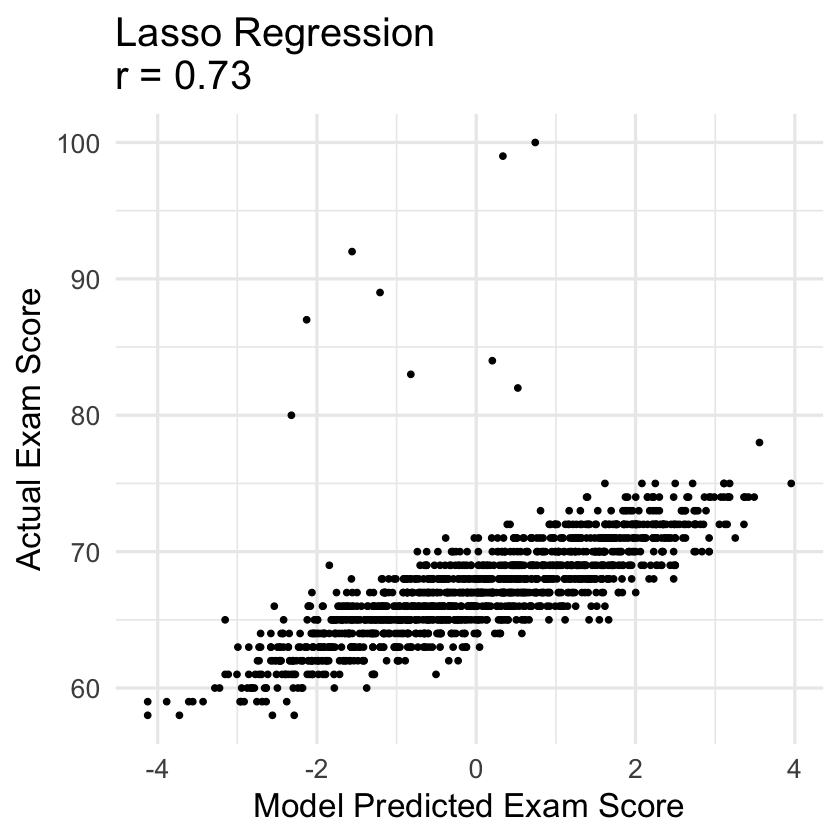

In [10]:
lambdas <- 10^seq(3, -2, by = -.1)

fit_lasso <- glmnet(x = x_train_scale, y = y_train,
                    alpha = 1, lambda = lambdas, intercept = FALSE)
cv_lasso <- cv.glmnet(x = x_train_scale, y = y_train,
                      alpha = 1, lambda = lambdas, intercept = FALSE,
                      grouped = FALSE)

opt_lambda <- cv_lasso$lambda.min

y_pred_lasso <- predict(fit_lasso, s = opt_lambda, newx = x_test_scale)

qplot(x = y_pred_lasso[, 1], y = y_test,
      main = paste0("Lasso Regression\n",
                    "r = ", round(cor(y_test, y_pred_lasso[, 1]), 2))) +
  geom_abline(color = "blue") +
  xlab("Model Predicted Exam Score") +
  ylab("Actual Exam Score") +
  theme_minimal(base_size = 20)

3. Ridge regression

Note that since multicollinearity is not a problem, OLS performs decently and ridge is alright with the given dataset. Note that ridge regression has an advantage in presence of multicollinearity.

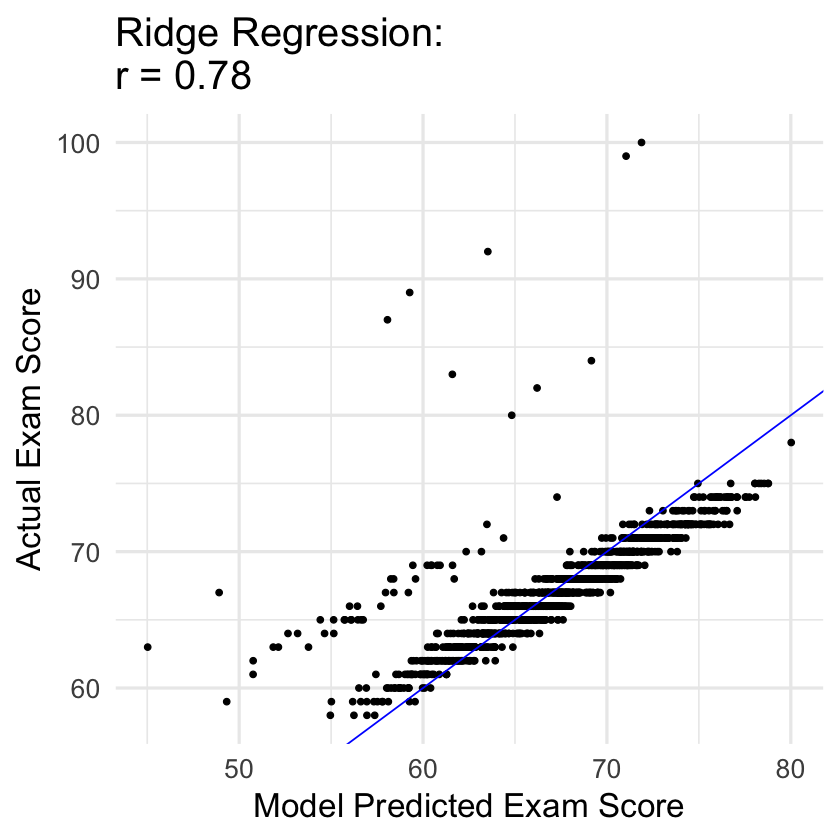

In [11]:
lambdas <- 10^seq(3, -2, by = -.1)

fit_ridge <- glmnet(x = x_train, y = y_train,
                    alpha = 0, lambda = lambdas, intercept = FALSE)
cv_ridge <- cv.glmnet(x = x_train, y = y_train,
                      alpha = 0, lambda = lambdas, intercept = FALSE,
                      grouped = FALSE)

opt_lambda <- cv_ridge$lambda.min

y_pred <- predict(fit_ridge, s = opt_lambda, newx = x_test)

qplot(x = y_pred[, 1], y = y_test,
      main = paste0("Ridge Regression:\n",
                    "r = ", round(cor(y_test, y_pred[, 1]), 2))) +
  geom_abline(color = "blue") +
  xlab("Model Predicted Exam Score") +
  ylab("Actual Exam Score") +
  theme_minimal(base_size = 20)

#### Bayesian Approach

1. No regularizer

2. LASSO regression

3. Ridge regression

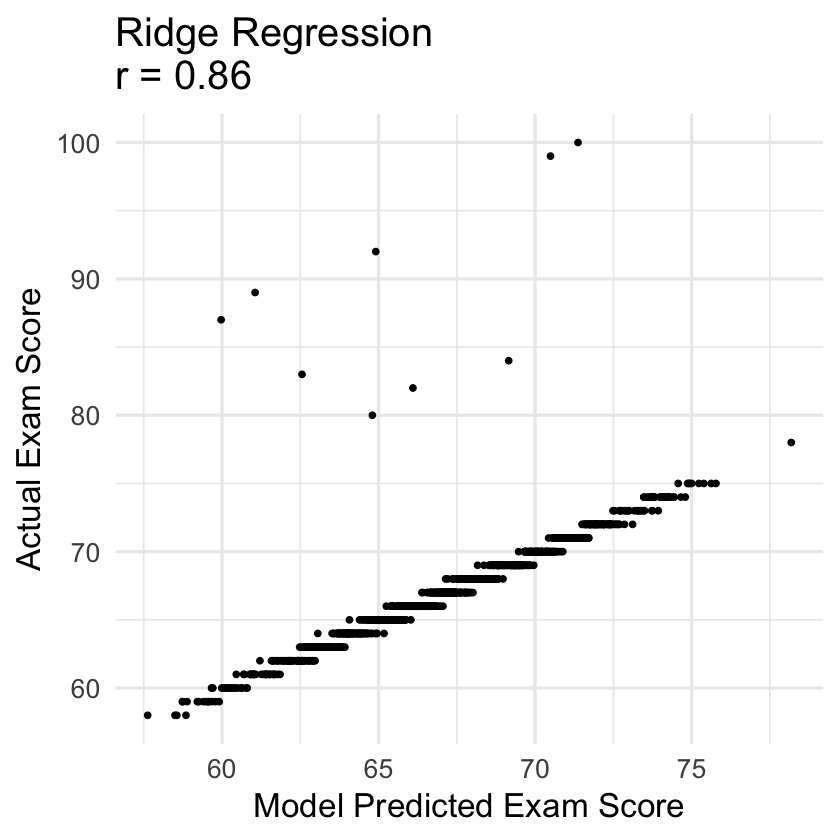

In [15]:
y_train_scale <- scale(y_train)
y_test_scale  <- scale(y_test, center = attr(y_train_scale, "scaled:center"),
                       scale = attr(y_train_scale, "scaled:scale"))

stan_data <- list(
  N_train = nrow(x_train_scale),
  N_test  = nrow(x_test_scale),
  N_pred  = ncol(x_train_scale),
  y_train = as.vector(y_train_scale),
  X_train = x_train_scale,
  X_test  = x_test_scale
)

bayes_ridge <- stan_model("ridge.stan")

fit_bayes <- sampling(bayes_ridge, data = stan_data,
                      iter = 2000, warmup = 500, chains = 3, cores = 3)

post <- extract(fit_bayes)
y_pred_scaled <- apply(post$y_test, 2, mean)

y_pred_bayes <- y_pred_scaled * attr(y_train_scale, "scaled:scale") +
  attr(y_train_scale, "scaled:center")

qplot(x = y_pred_bayes, y = y_test,
      main = paste0("Ridge Regression\nr = ",
                    round(cor(y_pred_bayes, y_test), 2))) +
  xlab("Model Predicted Exam Score") +
  ylab("Actual Exam Score") +
  theme_minimal(base_size = 20)